<h1 style="
  font-family: 'Americana XBdCn BT', sans-serif;
  font-size: 60px;
  text-align: center;
  line-height: 1.2;
  letter-spacing: 3px;
  padding: 20px 10px;
  border-radius: 12px;
  background: linear-gradient(to right, #f7f0e8, #e0f0ea);
  color: #2f4858;
  text-shadow: 2px 2px 5px rgba(0, 0, 0, 0.15);
">
  🧠 <span style="color: #91a66b;">RFM Analysis Project</span><br>
  <span style="color: #cf6d5c;">with Online Retail Dataset</span>
</h1>


In [1]:
# dataset: https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset

In [2]:
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from mpl_toolkits.mplot3d import Axes3D
import plotly.figure_factory as ff
import plotly.express as px
from umap import UMAP
import warnings
warnings.filterwarnings("ignore")

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Introduction to the Dataset</span>
</h1>


In [3]:
df = pd.read_excel("Online Retail.xlsx")

In [4]:
df1 = df.copy(deep=True)

In [5]:
print("Shape of the data:", df.shape)
print("A look of the data:")
df.head()

Shape of the data: (541909, 8)
A look of the data:


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
print("Total number of customer in the dataset:",df.CustomerID.nunique())
print("Data type information:")
df.dtypes

Total number of customer in the dataset: 4372
Data type information:


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [7]:
print("Unique value in the dataset:")
df.nunique()

Unique value in the dataset:


InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
print("A Look at Country Distribution:")
df.Country.value_counts()/df.shape[0]*100

A Look at Country Distribution:


Country
United Kingdom          91.431956
Germany                  1.752139
France                   1.579047
EIRE                     1.512431
Spain                    0.467422
Netherlands              0.437527
Belgium                  0.381798
Switzerland              0.369435
Portugal                 0.280305
Australia                0.232327
Norway                   0.200403
Italy                    0.148180
Channel Islands          0.139876
Finland                  0.128250
Cyprus                   0.114779
Sweden                   0.085254
Unspecified              0.082302
Austria                  0.073998
Denmark                  0.071783
Japan                    0.066063
Poland                   0.062926
Israel                   0.054806
USA                      0.053699
Hong Kong                0.053145
Singapore                0.042258
Iceland                  0.033585
Canada                   0.027864
Greece                   0.026942
Malta                    0.023436
United

In [9]:
print("A look at the Missing or Null Values in the Dataset:")
df.isna().sum()

A look at the Missing or Null Values in the Dataset:


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Phase I: Data Pre-processing starts here...</span>
</h1>


In [10]:
print("Dropping the null values")
df1.dropna(inplace=True)
print("DONE")
print("New Shape of the dataset:",df1.shape)

Dropping the null values
DONE
New Shape of the dataset: (406829, 8)


In [11]:
print("Duplicate entries in the dataset:",df.duplicated().sum())
duplicate_percentage = (df.duplicated().sum() / df.shape[0]) * 100
print(f"Percentage of duplicates present in the dataset: {duplicate_percentage:.2f}%")
print("Dropping all duplicates:")
df1.drop_duplicates(inplace = True)
print("...........................")
print("DONE")

Duplicate entries in the dataset: 5268
Percentage of duplicates present in the dataset: 0.97%
Dropping all duplicates:
...........................
DONE


In [12]:
print("Fixing the data types of CustomerID:")
df1['CustomerID'] = df1['CustomerID'].astype(str)
print("...........................")
print("DONE")

Fixing the data types of CustomerID:
...........................
DONE


In [13]:
print("Checking Unique values:")
df1.nunique()

Checking Unique values:


InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

In [14]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [15]:
df1.InvoiceNo.value_counts().index

Index([   576339,    579196,    580727,    578270,    573576,    567656,
          567183,    575607,    571441,    570488,
       ...
       'C544427',    544426, 'C544425',    544423, 'C566784', 'C566782',
       'C566779', 'C566775', 'C540156', 'C540152'],
      dtype='object', name='InvoiceNo', length=22190)

In [16]:
print("If you notice, there are some Invoice bills where there is a C at the beginning of it")
print("What is that C?")
print("Its the cancelled order which will help to flag cancelled Orders")
df1['order_cancelled'] = df1['InvoiceNo'].astype(str).str.contains('C', na=False).astype(int)
df1.order_cancelled.value_counts()

If you notice, there are some Invoice bills where there is a C at the beginning of it
What is that C?
Its the cancelled order which will help to flag cancelled Orders


order_cancelled
0    392732
1      8872
Name: count, dtype: int64

In [17]:
df1.describe()

,Quantity,InvoiceDate,UnitPrice,order_cancelled
count,401604.000000,401604,401604.000000,401604.000000
mean,12.183273,2011-07-10 12:08:23.848567552,3.474064,0.022091
min,-80995.000000,2010-12-01 08:26:00,0.000000,0.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,0.000000
50%,5.000000,2011-07-29 15:40:00,1.950000,0.000000
75%,12.000000,2011-10-20 11:58:30,3.750000,0.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,1.000000
std,250.283037,NaN,69.764035,0.146981


In [18]:
print("Got some negative values its time to leave those out")
df1 = df1[(df1['UnitPrice'] > 0) & (df1['Quantity'] > 0)].copy()
print("............................")
print("DONE")

Got some negative values its time to leave those out
............................
DONE


In [19]:
print("A column that sums up Quantity with UnitPrice.")
df1.loc[:, "TotalBill"] = df1["Quantity"] * df1["UnitPrice"]
print("Done")

A column that sums up Quantity with UnitPrice.
Done


In [20]:
df1.isna().sum()

InvoiceNo          0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID         0
Country            0
order_cancelled    0
TotalBill          0
dtype: int64

In [21]:
print("The new shape of the data:")
df1.shape

The new shape of the data:


(392692, 10)

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Phase II: Feature Engineering for RFM starts here...</span>
</h1>


<div style="
  font-family: 'Segoe UI', sans-serif;
  background: linear-gradient(to right, #e0f0ea, #f7f0e8);
  border-left: 6px solid #a1c5ab;
  border-radius: 12px;
  padding: 25px 30px;
  margin: 20px auto;
  max-width: 900px;
  color: #2f3e46;
  box-shadow: 4px 4px 12px rgba(0, 0, 0, 0.1);
  line-height: 1.7;
  font-size: 18px;
">
  <h2 style="
    font-family: 'Americana XBdCn BT', sans-serif;
    color: #35524a;
    font-size: 36px;
    text-align: center;
    margin-top: 0;
    margin-bottom: 20px;
    letter-spacing: 2px;
  ">
    💡 Understanding the RFM Model
  </h2>

  <p><strong style="color: #52796f;">RFM</strong> is a foundational customer segmentation technique that leverages purchasing behavior to group customers into meaningful categories. It relies on three key metrics:</p>

  <ul style="padding-left: 20px;">
    <li><strong style="color: #1b4332;">Recency</strong>: Measures how recently a customer made a purchase. Calculated as the number of days since their last transaction.</li>
    <li><strong style="color: #1b4332;">Frequency</strong>: Captures how often the customer has made purchases. Measured as the total number of orders within a defined period.</li>
    <li><strong style="color: #1b4332;">Monetary</strong>: Indicates how much the customer has spent. Can be expressed as total or average value.</li>
  </ul>

  <p>The <strong style="color: #52796f;">RFM model</strong> helps businesses segment customers and implement <span style="color: #6a994e;">tailored marketing strategies</span>. It’s widely used to identify <strong style="color: #bc4749;">High-Value Customers (HVCs)</strong> for better targeting and retention.</p>
</div>


In [22]:
print('Start date:' , df['InvoiceDate'].min())
print('End date:' , df['InvoiceDate'].max())

Start date: 2010-12-01 08:26:00
End date: 2011-12-09 12:50:00


In [23]:
import datetime as dt
current_date = max(df.InvoiceDate) + dt.timedelta(days=1)

In [24]:
current_date

Timestamp('2011-12-10 12:50:00')

In [25]:
data = df1.groupby('CustomerID').agg({'InvoiceDate': lambda x: (current_date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalBill': lambda x: x.sum()}).reset_index()
data['InvoiceDate'] = data['InvoiceDate'].astype(int)

# Rename columns
data.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalBill': 'MonetaryValue'}, inplace=True)

<div style="
  font-family: 'Segoe UI', sans-serif;
  background-color: #ffffff;
  border-left: 2px solid #d9c8a9;
  padding: 10px 25px;
  margin: 2px auto;
  max-width: 1000px;
  color: #333;
  font-size: 17px;
  line-height: 1.6;
  border-radius: 8px;
">

  <p>
    The code calculates <strong style="color: #8b7e66;">RFM</strong> values for each customer using their transaction data.
  </p>
  <p>
    It computes <strong style="color: #6f5f45;">Recency</strong> as the number of days since the customer's most recent purchase, based on a given snapshot date.
  </p>

  <p>
    <strong style="color: #6f5f45;">Frequency</strong> is measured by counting how many invoices or orders the customer has placed.
  </p>

  <p>
    <strong style="color: #6f5f45;">Monetary Value</strong> reflects the total revenue from that customer, indicating how much they have spent in total.
  </p>

</div>


In [26]:
print("The shape of data:",data.shape)
data.head()

The shape of data: (4338, 4)


,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [27]:
data.duplicated().sum()

np.int64(0)

In [28]:
data.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.536422,90.523744,2048.688081
std,100.014169,225.506968,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.000000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


<div style="
  font-family: 'Segoe UI', sans-serif;
  background-color: #ffffff;
  border-left: 2px solid #d9c8a9;
  padding: 10px 25px;
  margin: 2px auto;
  max-width: 1000px;
  color: #333;
  font-size: 17px;
  line-height: 1.6;
  border-radius: 8px;
">
  <p><strong>Frequency</strong>: The distribution is heavily skewed due to a few customers making extremely frequent purchases. Most customers place far fewer orders in comparison.</p>
</p>
  <p><strong>MonetaryValue</strong>: A small group of customers account for significantly higher spending, while the majority contribute much less. The values are highly imbalanced and need transformation.</p>
</div>


In [29]:
print("Shape of the new datafeame:",data.shape)
print("A look at the data:")
data.head()

Shape of the new datafeame: (4338, 4)
A look at the data:


,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40


In [30]:
data.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.536422,90.523744,2048.688081
std,100.014169,225.506968,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.000000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


In [31]:
data.duplicated().sum()

np.int64(0)

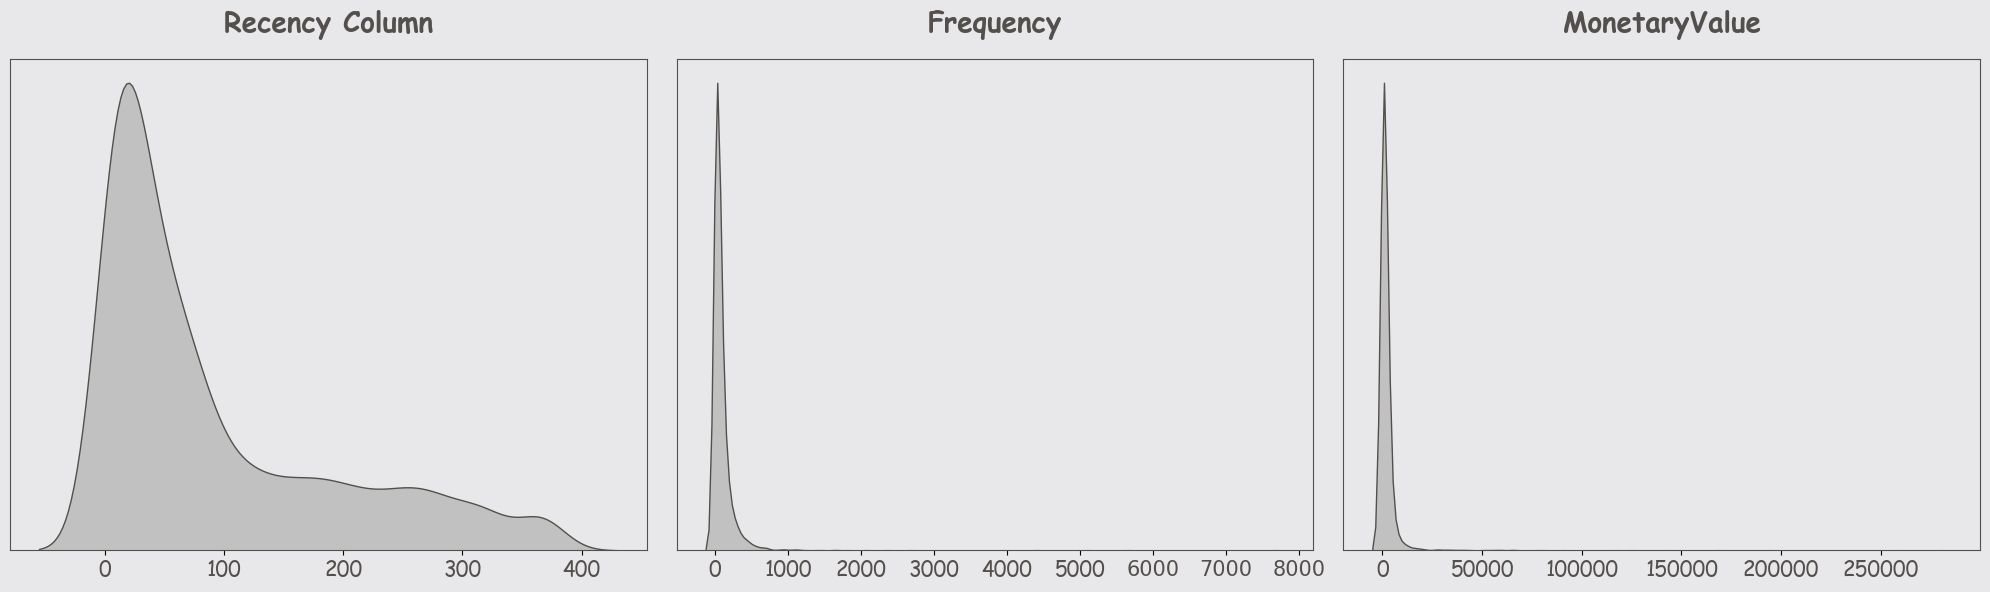

In [32]:
colors = ["#e8e8ea", "#534f4c"]
fig = plt.figure(figsize=(20, 6), facecolor=colors[0])

# Plot 1 – Recency
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax1.set_facecolor(colors[0])
sns.kdeplot(data['Recency'], ax=ax1, color=colors[1], fill=True)
ax1.text(0.5, 1.07, 'Recency Column', ha='center', va='center', transform=ax1.transAxes,
         font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[1])

# Plot 2 – Frequency
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax2.set_facecolor(colors[0])
sns.kdeplot(data['Frequency'], ax=ax2, color=colors[1],fill=True)
ax2.text(0.5, 1.07, 'Frequency', ha='center', va='center', transform=ax2.transAxes,
         font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[1])

# Plot 3 – MonetaryValue
ax3 = plt.subplot2grid((1, 3), (0, 2))
ax3.set_facecolor(colors[0])
sns.kdeplot(data['MonetaryValue'], ax=ax3, color=colors[1], fill=True)
ax3.text(0.5, 1.07, 'MonetaryValue', ha='center', va='center', transform=ax3.transAxes,
         font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[1])
axes = [ax1, ax2, ax3]
for ax in axes:
        ax.set_xlabel("")                         # Remove x-axis label
        ax.set_ylabel("")                         # Remove y-axis label
        ax.set_yticks([])                         # Hide y-ticks
        ax.tick_params(axis='x', labelsize=15, labelcolor=colors[1])  # x-tick font settings
        for label in ax.get_xticklabels():
            label.set_fontname("Comic Sans MS")
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color(colors[1])
plt.tight_layout()
plt.show()


In [33]:
print(data.Recency.skew())
print(data.Frequency.skew())
print(data.MonetaryValue.skew())

1.2460475158158468
18.043529536033585
19.339367981525182


<div style="
  font-family: 'Segoe UI', sans-serif;
  background-color: #ffffff;
  border-left: 2px solid #d9c8a9;
  padding: 10px 25px;
  margin: 2px auto;
  max-width: 1000px;
  color: #333;
  font-size: 17px;
  line-height: 1.6;
  border-radius: 8px;
">
  <p><strong>Recency (moderate skew)</strong>: Most customers purchased recently, while a few haven't returned in a long time, creating a mild right-skew.</p>
  <p><strong>Frequency (extreme skew)</strong>: A tiny fraction of customers buy very often, but most purchase rarely. This imbalance can severely distort clustering outcomes.</p>
  <p><strong>MonetaryValue (heavy skew)</strong>: Most customers spend small amounts, but a few contribute disproportionately high revenue. This skew can mislead distance-based models.</p>
</div>


<div style="
  font-family: 'Segoe UI', sans-serif;
  background-color: #ffffff;
  border-left: 2px solid #d9c8a9;
  padding: 10px 25px;
  margin: 2px auto;
  max-width: 1000px;
  color: #333;
  font-size: 17px;
  line-height: 1.6;
  border-radius: 8px;
">
    <h3 style="margin-top: 0; color: #6b5e4d;">Why Skewed Data Needs Transformation in Clustering</h3>
  <p><strong>Distance distortion in clustering</strong>: Skewed data creates large outliers that distort distance calculations, leading to inaccurate and biased cluster formations.</p>
  <p><strong>Mean-based centroid issues</strong>: In skewed data, means are dragged toward outliers, making centroids less representative of typical customer patterns.</p>
  <p><strong>False confidence in metrics</strong>: Skewed data violates assumptions of clustering metrics, giving misleadingly high scores and unreliable validation.</p>
  <p><strong>Unbalanced feature influence</strong>: Features with larger ranges dominate clustering, so raw skewed data reflects size, not meaningful customer traits.</p>
</div>


In [34]:
colors = ["#084c61"] 
background = ["#f0f8ff"]

In [35]:
def skewness_detection1(x, color):
    fig = plt.figure(figsize=(20, 10), facecolor=background[0])

    # Plot 1 – Raw
    ax1 = plt.subplot2grid((2, 2), (0, 0))
    ax1.set_facecolor(background[0])
    sns.histplot(data[x], kde=True, ax=ax1, color=color, edgecolor=color,element="step", fill=True)
    ax1.text(0.5, 1.05, f'{x} Transformation: None', ha='center', va='center', transform=ax1.transAxes,
             font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[0])

    # Plot 2 – Log
    ax2 = plt.subplot2grid((2, 2), (0, 1))
    ax2.set_facecolor(background[0])
    sns.histplot(np.log(data[x]), kde=True, ax=ax2, color=color,element="step", fill=True)
    ax2.text(0.5, 1.05, f'{x} Transformation: Logarithm', ha='center', va='center', transform=ax2.transAxes,
             font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[0])

    # Plot 3 – Square Root
    ax3 = plt.subplot2grid((2, 2), (1, 0))
    ax3.set_facecolor(background[0])
    sns.histplot(np.sqrt(data[x]), kde=True, ax=ax3, color=color,element="step", fill=True)
    ax3.text(0.5, 1.05, f'{x} Transformation: Square Root', ha='center', va='center', transform=ax3.transAxes,
             font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[0])

    # Plot 4 – Box-Cox
    ax4 = plt.subplot2grid((2, 2), (1, 1))
    ax4.set_facecolor(background[0])
    sns.histplot(stats.boxcox(data[x])[0], kde=True, ax=ax4, color=color,element="step", fill=True)
    ax4.text(0.5, 1.05, f'{x} Transformation: Boxcox', ha='center', va='center', transform=ax4.transAxes,
         fontname="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[0])

    axes = [ax1, ax2, ax3, ax4]

    # Apply global styling to each plot
    for ax in axes:
        ax.set_xlabel("")                         # Remove x-axis label
        ax.set_ylabel("")                         # Remove y-axis label
        ax.set_yticks([])                         # Hide y-ticks
        ax.tick_params(axis='x', labelsize=15, labelcolor=colors[0])  # x-tick font settings

        # Set x-tick labels font
        for label in ax.get_xticklabels():
            label.set_fontname("Comic Sans MS")

        # Show all spines and set their color
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color(colors[0])

    plt.tight_layout()
    plt.show()


In [36]:
def skewness_description1(x):
    original_skew = data[x].skew().round(2)
    log_skew = np.log(data[x]).skew().round(2)
    sqrt_skew = np.sqrt(data[x]).skew().round(2)
    boxcox_skew = pd.Series(stats.boxcox(data[x])[0]).skew().round(2)

    print(f"Logarithmic Transformation: Skew reduced from {original_skew} to {log_skew}")
    print(f"Square Root Transformation: Skew reduced from {original_skew} to {sqrt_skew}")
    print(f"Box-Cox Transformation: Skew reduced from {original_skew} to {boxcox_skew}")
    print("************************************************************************************")

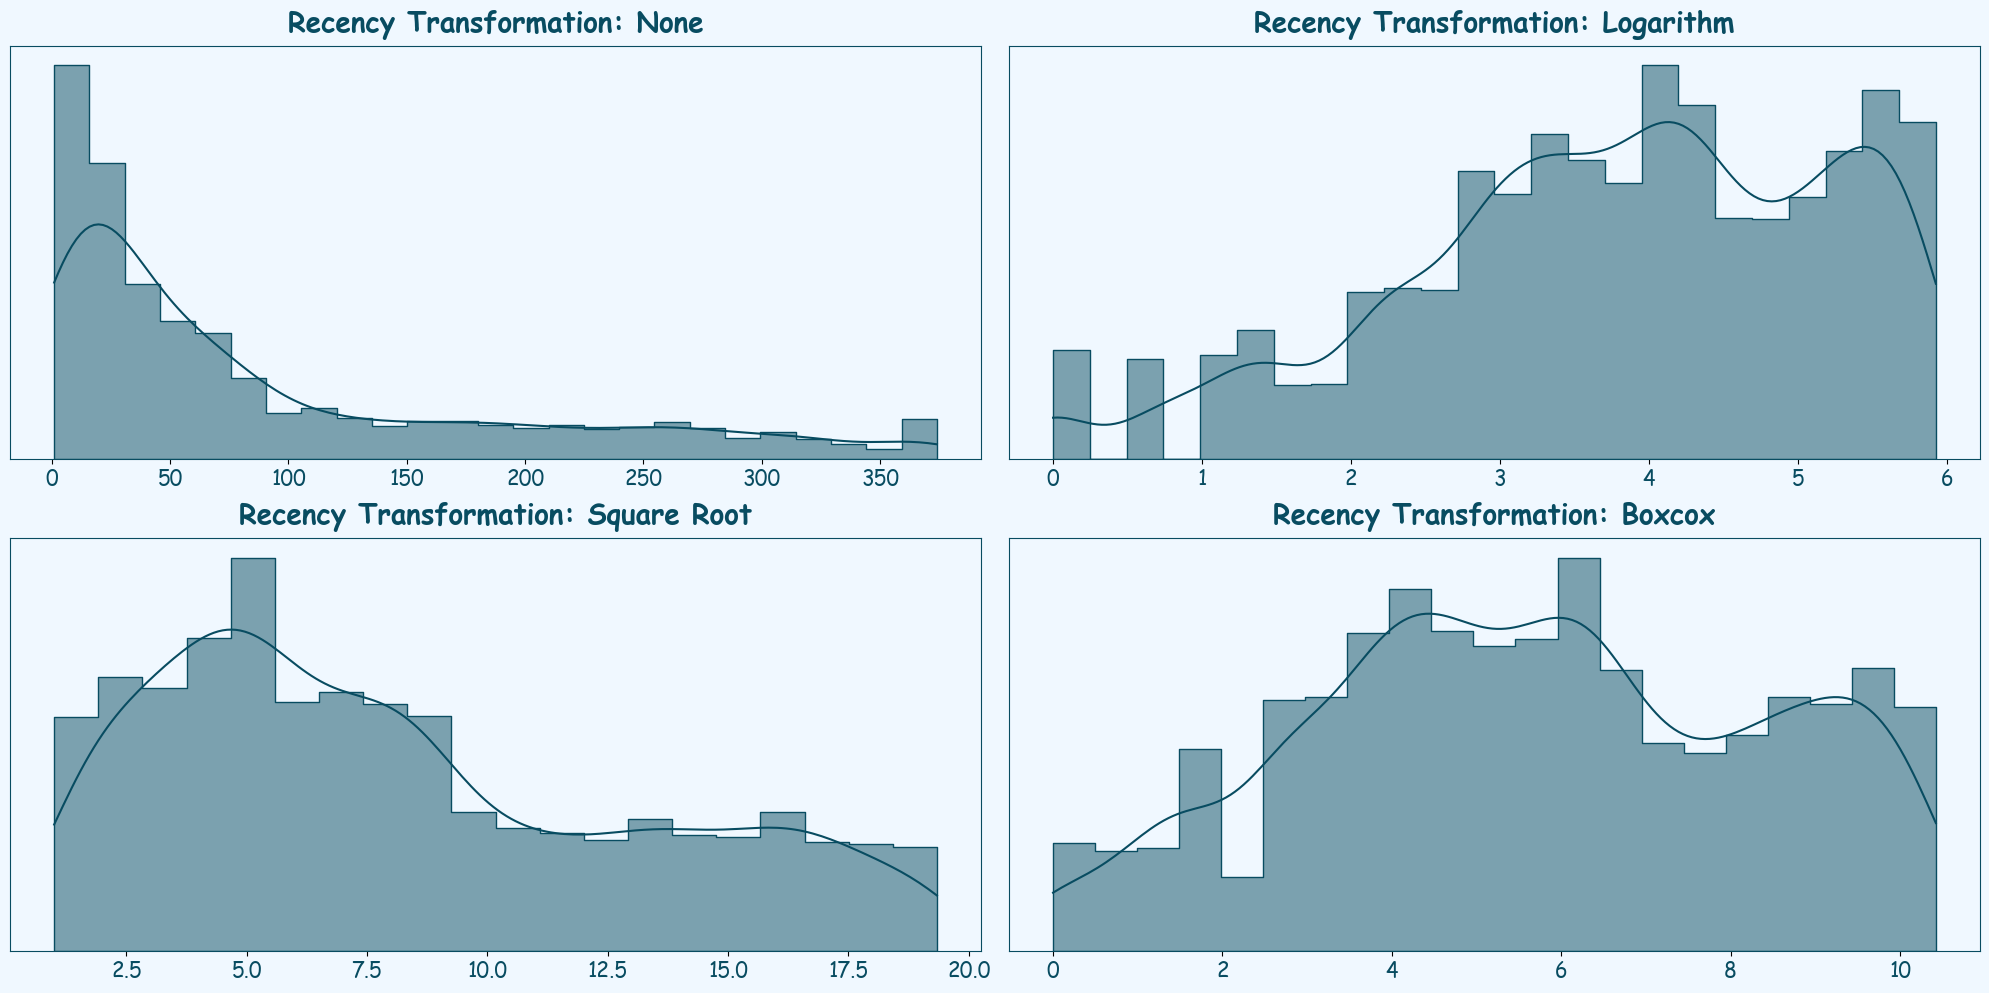

Logarithmic Transformation: Skew reduced from 1.25 to -0.55
Square Root Transformation: Skew reduced from 1.25 to 0.59
Box-Cox Transformation: Skew reduced from 1.25 to -0.07
************************************************************************************


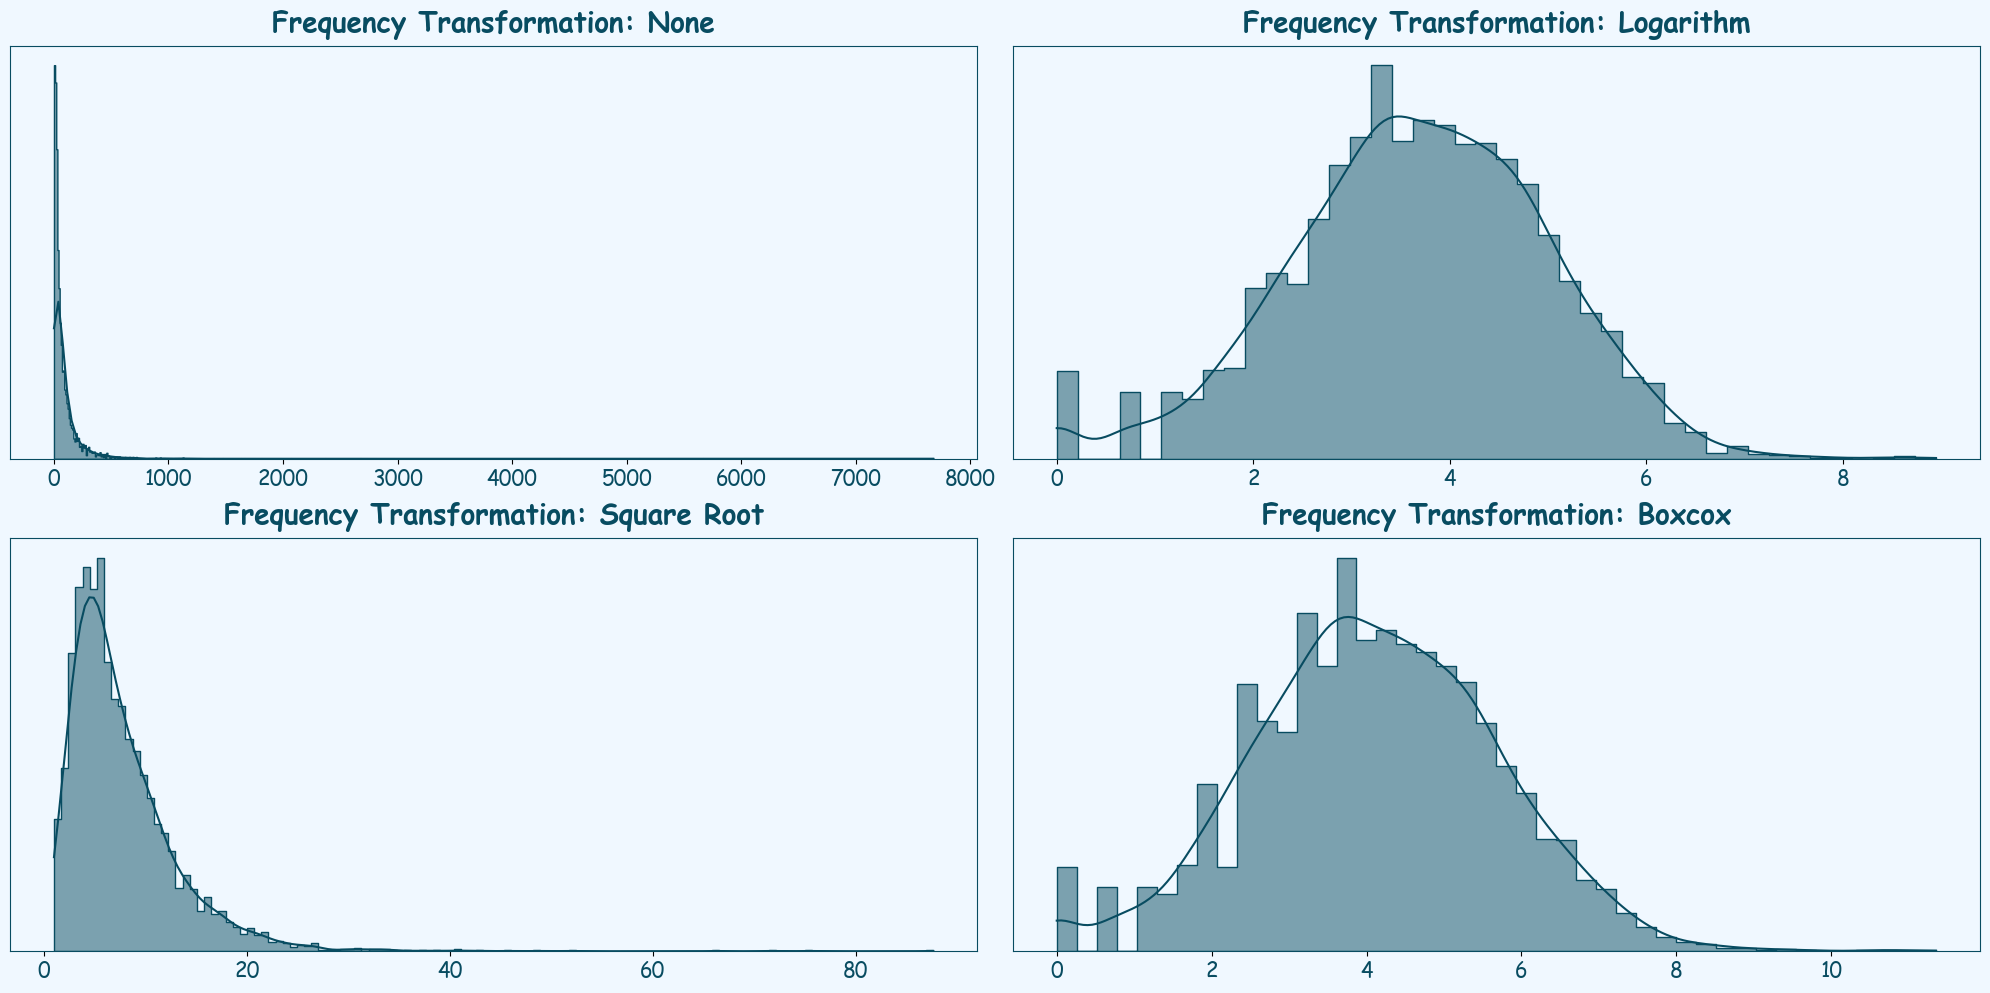

Logarithmic Transformation: Skew reduced from 18.04 to -0.22
Square Root Transformation: Skew reduced from 18.04 to 3.23
Box-Cox Transformation: Skew reduced from 18.04 to 0.0
************************************************************************************


In [37]:
skewness_detection1("Recency",color=colors[0])
skewness_description1("Recency")
skewness_detection1("Frequency",color=colors[0])
skewness_description1("Frequency")

Why Choose Box-Cox:

- Automatically selects the best λ for reducing skew.

- Outperforms log and sqrt for highly skewed, positive-only data.

- Makes data more normal-like, helping clustering and distance-based models behave better.

In [38]:
def skewness_detection2(x, color):
    fig = plt.figure(figsize=(24, 6), facecolor=background[0])

    # Plot 1 – Square Root
    ax1 = plt.subplot2grid((1, 3), (0, 0))
    ax1.set_facecolor(background[0])
    sns.histplot(np.sqrt(data[x]), kde=True, ax=ax1, color=color, element="step", fill=True)
    ax1.text(0.5, 1.05, f'{x} Transformation: Square Root', ha='center', va='center', transform=ax1.transAxes,
             font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[0])

    # Plot 2 – Box-Cox
    ax2 = plt.subplot2grid((1, 3), (0, 1))
    ax2.set_facecolor(background[0])
    sns.histplot(stats.boxcox(data[x])[0], kde=True, ax=ax2, color=color, element="step", fill=True)
    ax2.text(0.5, 1.05, f'{x} Transformation: Box-Cox', ha='center', va='center', transform=ax2.transAxes,
             font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[0])

    # Plot 3 – Cube Root
    ax3 = plt.subplot2grid((1, 3), (0, 2))
    ax3.set_facecolor(background[0])
    sns.histplot(np.cbrt(data[x]), kde=True, ax=ax3, color=color, element="step", fill=True)
    ax3.text(0.5, 1.05, f'{x} Transformation: Cube Root', ha='center', va='center', transform=ax3.transAxes,
             font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[0])

    axes = [ax1, ax2, ax3]
    for ax in axes:
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_yticks([])
        ax.tick_params(axis='x', labelsize=15, labelcolor=colors[0])

        for label in ax.get_xticklabels():
            label.set_fontname("Comic Sans MS")

        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color(colors[0])

    plt.tight_layout()
    plt.show()


In [39]:
def skewness_description2(x):
    original_skew = data[x].skew().round(2)
    sqrt_skew = np.sqrt(data[x]).skew().round(2)
    boxcox_skew = pd.Series(stats.boxcox(data[x])[0]).skew().round(2)
    cbrt_skew = np.cbrt(data[x]).skew().round(2)

    print(f"Square Root Transformation: Skew reduced from {original_skew} to {sqrt_skew}")
    print(f"Box-Cox Transformation: Skew reduced from {original_skew} to {boxcox_skew}")
    print(f"Cube Root Transformation: Skew reduced from {original_skew} to {cbrt_skew}")
    print("************************************************************************************")

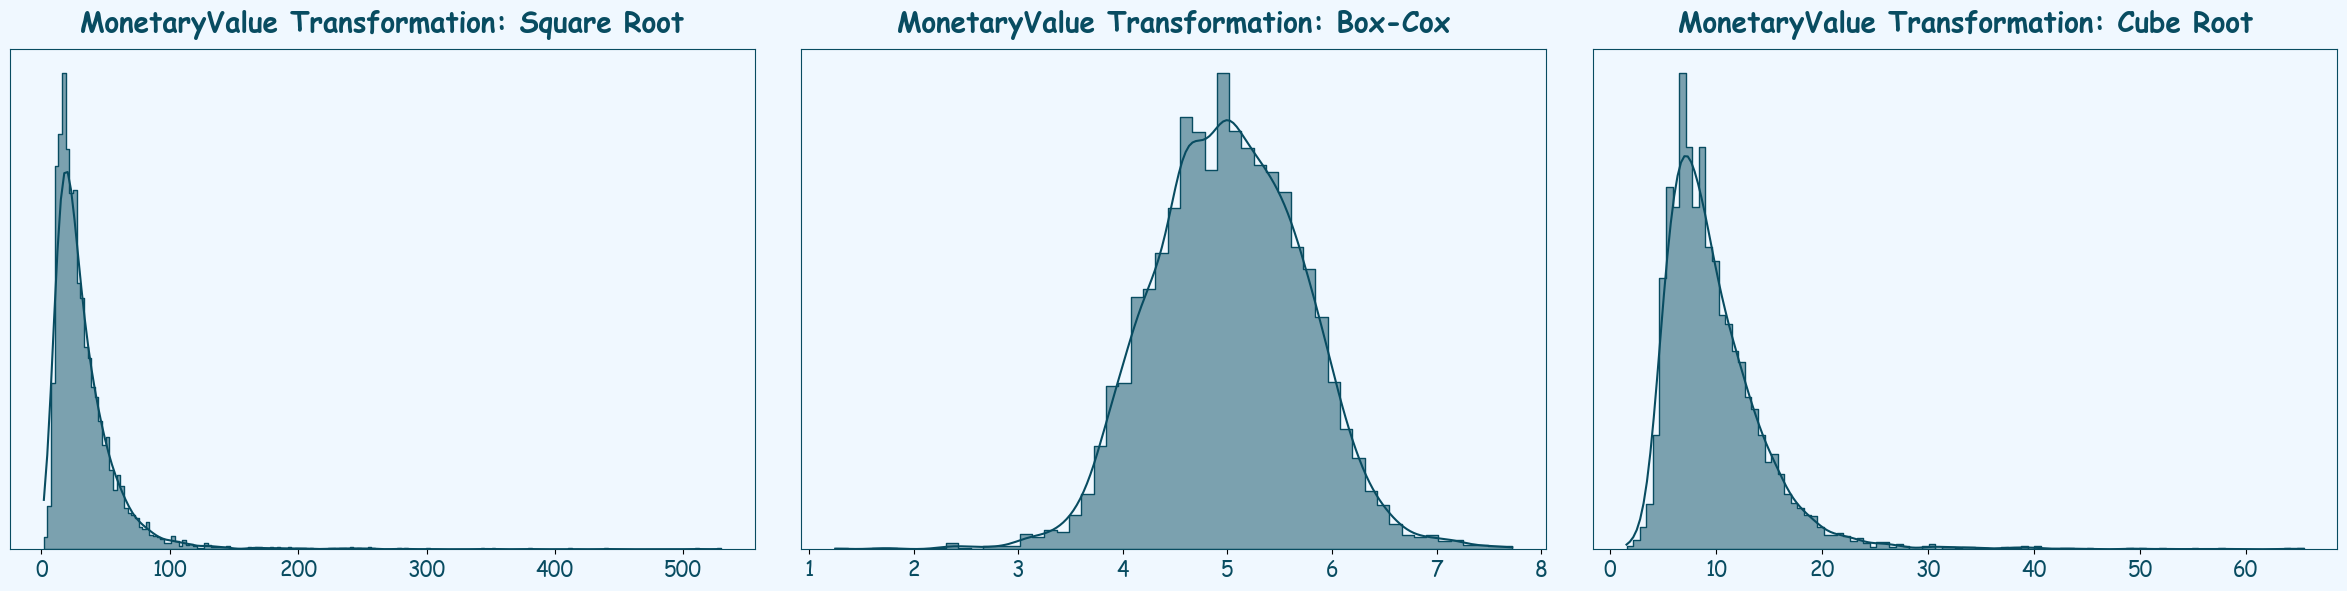

In [40]:
skewness_detection2("MonetaryValue", colors[0])

In [41]:
skewness_description2("MonetaryValue")

Square Root Transformation: Skew reduced from 19.34 to 5.89
Box-Cox Transformation: Skew reduced from 19.34 to -0.02
Cube Root Transformation: Skew reduced from 19.34 to 3.0
************************************************************************************


In [42]:
rfm_ready1 = pd.DataFrame()
rfm_ready1["Recency"] = stats.boxcox(data['Recency'])[0]
rfm_ready1["Frequency"] = stats.boxcox(data['Frequency'])[0]
rfm_ready1["MonetaryValue"] = pd.Series(np.cbrt(data['MonetaryValue'])).values
rfm_ready1.head()

,Recency,Frequency,MonetaryValue
0,10.039089,0.000000,42.576995
1,0.737107,5.964958,16.273929
2,6.460361,3.755086,12.158183
3,3.855960,4.799349,12.068017
4,9.900640,3.049494,6.941001


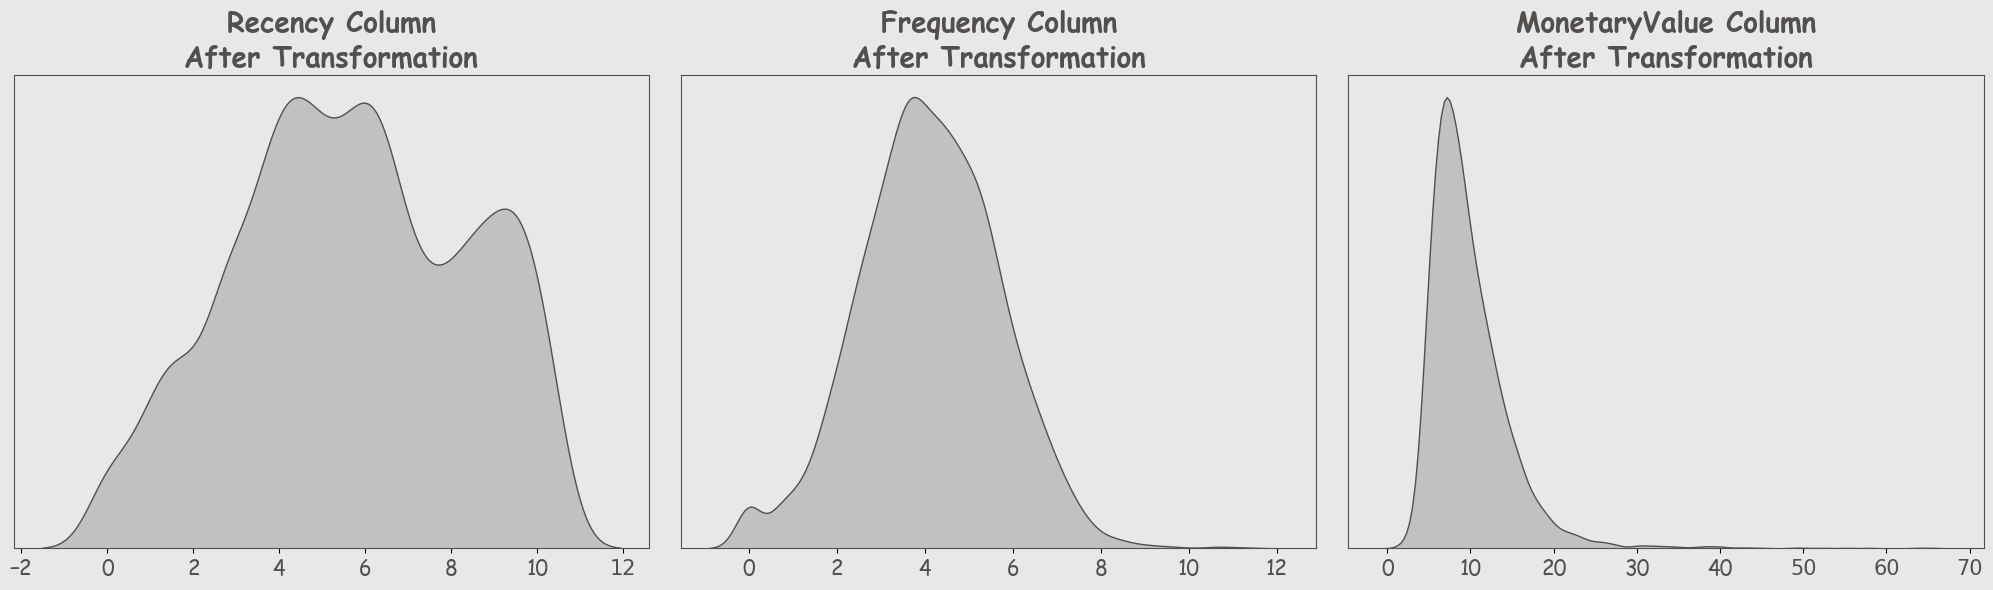

In [43]:
colors = ["#e8e8ea", "#534f4c"]
fig = plt.figure(figsize=(20, 6), facecolor=colors[0])

# Plot 1 – Recency
ax1 = plt.subplot2grid((1, 3), (0, 0))
ax1.set_facecolor(colors[0])
sns.kdeplot(rfm_ready1['Recency'], ax=ax1, color=colors[1], fill=True)
ax1.text(0.5, 1.07, 'Recency Column\nAfter Transformation', ha='center', va='center', transform=ax1.transAxes,
         font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[1])

# Plot 2 – Frequency
ax2 = plt.subplot2grid((1, 3), (0, 1))
ax2.set_facecolor(colors[0])
sns.kdeplot(rfm_ready1['Frequency'], ax=ax2, color=colors[1],fill=True)
ax2.text(0.5, 1.07, 'Frequency Column\nAfter Transformation', ha='center', va='center', transform=ax2.transAxes,
         font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[1])

# Plot 3 – MonetaryValue
ax3 = plt.subplot2grid((1, 3), (0, 2))
ax3.set_facecolor(colors[0])
sns.kdeplot(rfm_ready1['MonetaryValue'], ax=ax3, color=colors[1], fill=True)
ax3.text(0.5, 1.07, 'MonetaryValue Column\nAfter Transformation', ha='center', va='center', transform=ax3.transAxes,
         font="Comic Sans MS", fontsize=20, fontweight="bold", color=colors[1])
axes = [ax1, ax2, ax3]
for ax in axes:
        ax.set_xlabel("")                         # Remove x-axis label
        ax.set_ylabel("")                         # Remove y-axis label
        ax.set_yticks([])                         # Hide y-ticks
        ax.tick_params(axis='x', labelsize=15, labelcolor=colors[1])  # x-tick font settings
        for label in ax.get_xticklabels():
            label.set_fontname("Comic Sans MS")
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color(colors[1])
plt.tight_layout()
plt.show()


<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Clustering the datapoints</span>
</h1>


In [44]:
from sklearn.preprocessing import StandardScaler
rfm = rfm_ready1[['Recency', 'Frequency', 'MonetaryValue']].copy()
scaler = StandardScaler()
rfm_scaled_array = scaler.fit_transform(rfm)
rfm_scaled_df = pd.DataFrame(
    rfm_scaled_array, 
    columns=['Recency', 'Frequency', 'MonetaryValue'])

In [45]:
rfm_scaled_df.head()

,Recency,Frequency,MonetaryValue
0,1.624870,-2.577079,6.614538
1,-1.841636,1.177777,1.295062
2,0.291210,-0.213306,0.462702
3,-0.679354,0.444043,0.444467
4,1.573275,-0.657466,-0.592410


In [46]:
rfm_scaled_df.shape

(4338, 3)

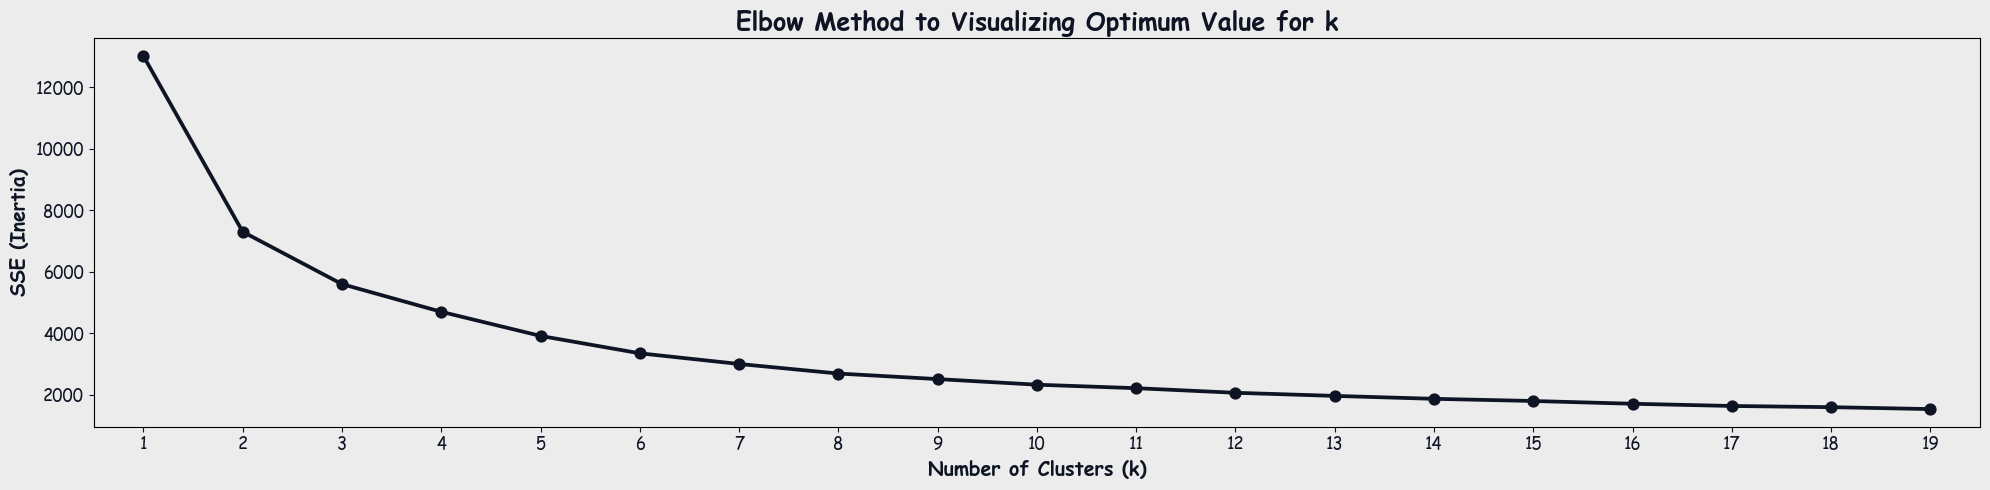

In [47]:
facecolor = "#ececec"
tick_color = "#0e1424"
font_style = "Comic Sans MS"
fig = plt.figure(figsize=(20, 5), facecolor="#ececec")
ax = plt.subplot2grid((1, 1), (0, 0))
ax.set_facecolor("#ececec")

# Compute SSE and distortions
K = range(1, 20)
distortions = []
sse = {}

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled_df)
    
    distortion = sum(np.min(cdist(rfm_scaled_df, kmeans.cluster_centers_, 'euclidean'), axis=1)) / rfm_scaled_df.shape[0]
    distortions.append(distortion)
    sse[k] = kmeans.inertia_

# Plot SSE
sns.pointplot(x=list(sse.keys()), y=list(sse.values()), ax=ax, color=tick_color)

# Title and labels
ax.set_title("Elbow Method to Visualizing Optimum Value for k", fontsize=18, fontweight='bold',
             fontname=font_style, color=tick_color)
ax.set_xlabel("Number of Clusters (k)", fontsize=14, fontname=font_style, color=tick_color,fontweight="bold")
ax.set_ylabel("SSE (Inertia)", fontsize=14, fontname=font_style, color=tick_color,fontweight="bold")

# Customize ticks
ax.tick_params(axis='x', colors=tick_color, labelsize=12)
ax.tick_params(axis='y', colors=tick_color, labelsize=12)
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontname(font_style)

# Remove grid if not needed
ax.grid(False)

plt.tight_layout()
plt.show()

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 20px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Clustering with k = 3</span>
</h1>


In [48]:
model1 = KMeans(n_clusters=3, random_state=1220)
model1.fit(rfm_scaled_df)
model1.labels_.shape

(4338,)

In [49]:
data["Cluster3"] = model1.labels_
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,Cluster3
0,12346.0,326,1,77183.60,1
1,12347.0,2,182,4310.00,1
2,12348.0,75,31,1797.24,0
3,12349.0,19,73,1757.55,0
4,12350.0,310,17,334.40,2


In [50]:
data.Cluster3.value_counts()

Cluster3
0    1940
2    1667
1     731
Name: count, dtype: int64

In [51]:
1940+1667+731

4338

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 20px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Clustering with k = 4</span>
</h1>


In [52]:
model2 = KMeans(n_clusters=4, random_state=43)
model2.fit(rfm_scaled_df)
model2.labels_.shape

(4338,)

In [53]:
data["Cluster4"] = model2.labels_
data.head()

,CustomerID,Recency,Frequency,MonetaryValue,Cluster3,Cluster4
0,12346.0,326,1,77183.60,1,3
1,12347.0,2,182,4310.00,1,2
2,12348.0,75,31,1797.24,0,1
3,12349.0,19,73,1757.55,0,2
4,12350.0,310,17,334.40,2,0


In [54]:
data.Cluster4.value_counts()

Cluster4
1    1674
0    1462
2    1122
3      80
Name: count, dtype: int64

In [55]:
1674+1462+1122+80

4338

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Checking the effectiveness of both Clusters</span>
</h1>


In [56]:
data.groupby('Cluster3')[['Recency', 'Frequency', 'MonetaryValue']].mean()

,Recency,Frequency,MonetaryValue
Cluster3,,,
0,42.144330,67.786082,1067.058352
1,19.563611,312.768810,8442.448919
2,183.180564,19.527894,387.333852


In [57]:
data.groupby('Cluster4')[['Recency', 'Frequency', 'MonetaryValue']].mean()

,Recency,Frequency,MonetaryValue
Cluster4,,,
0,204.358413,21.243502,419.618072
1,42.028674,45.201912,731.705826
2,27.566845,201.253119,3266.507051
3,17.062500,752.000000,42297.885125


In [58]:
from sklearn.metrics import silhouette_score
print("Silhoutte Score for Cluster3:",silhouette_score(rfm_scaled_df, data['Cluster3']))
print("Silhoutte Score for Cluster4:",silhouette_score(rfm_scaled_df, data['Cluster4']))

Silhoutte Score for Cluster3: 0.32402449596439276
Silhoutte Score for Cluster4: 0.31271690958106735


<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Visulising the data With Both Clusters </span>
</h1>


In [59]:
main_df = data[["CustomerID", "Cluster3", "Cluster4"]].copy()
main_df = pd.concat([main_df, rfm_scaled_df[["Recency", "Frequency", "MonetaryValue"]]], axis=1)
main_df.head()


,CustomerID,Cluster3,Cluster4,Recency,Frequency,MonetaryValue
0,12346.0,1,3,1.624870,-2.577079,6.614538
1,12347.0,1,2,-1.841636,1.177777,1.295062
2,12348.0,0,1,0.291210,-0.213306,0.462702
3,12349.0,0,2,-0.679354,0.444043,0.444467
4,12350.0,2,0,1.573275,-0.657466,-0.592410


In [60]:
colors3 = ["#0d0887","#6a00a8","#e16462"]
        # purple     pink      red-pink 
colors4 = ["#0d0887","#6a00a8","#e16462","#f0f921"]
        # purple     pink      red-pink  green

In [61]:
cltr4_percent

NameError: name 'cltr4_percent' is not defined

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the figure
fig = plt.figure(figsize=(20, 5), facecolor=facecolor)

# First plot: Cluster3 KDE
ax1 = plt.subplot2grid((1, 2), (0, 0))
ax1.set_facecolor(facecolor)
cltr3_percent = round(main_df["Cluster3"].value_counts()/main_df.shape[0]*100,2).reset_index()
sns.barplot(x=cltr3_percent["Cluster3"],y=cltr3_percent["count"],palette=colors3,ax=ax1,width=0.5)
ax1.set_title("Cluster Distribution in 3 clusters",weight="bold",font="Times New Roman",fontsize=25)
ax1.set_xlabel("")
ax1.set_ylabel("")
# ax1.set_xticks([])
ax1.set_yticks([])

# Second plot: Cluster4 KDE
ax2 = plt.subplot2grid((1, 2), (0, 1))
ax2.set_facecolor(facecolor)
cltr4_percent = round(main_df["Cluster4"].value_counts()/main_df.shape[0]*100,2).reset_index()
sns.barplot(x=cltr4_percent["Cluster4"],y=cltr4_percent["count"],palette=colors4,ax=ax2,width=0.5)
ax2.set_title("Cluster Distribution in 4 clusters",font="Times New Roman",fontsize=25)
ax2.set_xlabel("")
ax2.set_ylabel("")
# ax2.set_xticks([])
ax2.set_yticks([])
for ax in [ax1, ax2]:
    for label in ax.get_xticklabels():
        label.set_fontname("Comic Sans MS")
        label.set_fontsize(12)
        label.set_fontweight("bold")

for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color(colors3[0])
ax1.text(-0.05,45,"44.7%",fontsize=15,color=colors3[0],fontweight="bold",font="Comic Sans MS")
ax1.text(0.96,17,"38.4%",fontsize=15,color=colors3[1],fontweight="bold",font="Comic Sans MS")
ax1.text(1.97,39,"16.8%",fontsize=15,color=colors3[2],fontweight="bold",font="Comic Sans MS")
ax2.text(-0.06,34,"38.5%",fontsize=15,color=colors4[0],fontweight="bold",font="Comic Sans MS")
ax2.text(0.93,39,"33.7%",fontsize=15,color=colors4[1],fontweight="bold",font="Comic Sans MS")
ax2.text(1.93,26,"25.8%",fontsize=15,color=colors4[2],fontweight="bold",font="Comic Sans MS")
ax2.text(2.93,2,"1.84%",fontsize=15,color=colors4[3],fontweight="bold",font="Comic Sans MS")
plt.tight_layout()
plt.show()

<div style="
  font-family: 'Americana XBdCn BT', sans-serif;
  font-size: 17px;
  color: #2f4858;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.1);
  padding: 15px 25px;
  border-left: 5px solid #cf6d5c;
  border-radius: 8px;
  line-height: 1.7;
  max-width: 1200px;
  margin: 20px auto;
  background-color: #ffffff;
">
  <ul style="margin: 0; padding-left: 15px; list-style-type: circle;">
    <li><strong style="color:#91a66b;">3-cluster model</strong> shows reasonably balanced segments; the smallest group still represents a significant portion of customers.</li>
    <li><strong style="color:#91a66b;">4-cluster model</strong> introduces a tiny cluster (~2%), which may represent outliers or niche behavior.</li>
    <li>Adding the <strong style="color:#91a66b;">4th cluster</strong> increases granularity but reduces practical balance among groups.</li>
    <li>Most customers fall into two major segments in both models, indicating a <strong style="color:#91a66b;">dominant behavioral pattern</strong>.</li>
    <li>Cluster proportions shift slightly, but no major reshuffling occurs — <strong style="color:#91a66b;">segmentation remains mostly stable</strong>.</li>
  </ul>
</div>


In [ ]:
cols = ["Recency","Frequency","MonetaryValue"]
for i in cols:
    fig = plt.figure(figsize=(18, 6), facecolor=facecolor)
    
    ax1 = plt.subplot2grid((1, 2), (0, 0))
    ax1.set_facecolor(facecolor)
    sns.kdeplot(x=main_df[i],hue=main_df["Cluster3"],fill=True,palette=colors3,ax=ax1)
    ax1.set_xlabel(f"{i}", fontname="Comic Sans MS", fontweight="bold",fontsize=15)
    ax1.set_ylabel("")
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # Second plot: Cluster4 KDE
    ax2 = plt.subplot2grid((1, 2), (0, 1))
    ax2.set_facecolor(facecolor)
    sns.kdeplot(x=main_df[i],hue=main_df["Cluster4"],fill=True,palette=colors4,ax=ax2)
    ax2.set_xlabel(f"{i}", fontname="Comic Sans MS", fontweight="bold",fontsize=15)
    ax2.set_ylabel("")
    ax2.set_xticks([])
    ax2.set_yticks([])
    for ax in [ax1, ax2]:
        for spine in ax.spines.values():
            spine.set_visible(True)
            spine.set_color(colors3[0])

    plt.tight_layout()
    plt.show()


<div style="
  font-family: 'Americana XBdCn BT', sans-serif;
  font-size: 17px;
  color: #2f4858;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.1);
  padding: 15px 25px;
  border-left: 5px solid #cf6d5c;
  border-radius: 8px;
  line-height: 1.7;
  max-width: 1200px;
  margin: 20px auto;
  background-color: #ffffff;
">
  <ul style="margin: 0; padding-left: 15px; list-style-type: circle;">
    <li><strong style="color:#91a66b;">Recency Plot:</strong> In both cases, one cluster reflects loyal buyers, while another shows dormant ones. Adding a fourth cluster helps segment moderately engaged customers more effectively.</li>
    <li><strong style="color:#91a66b;">Frequency Plot:</strong> One segment in both models captures loyal, repeat buyers, while another covers one-time or rare purchasers. The fourth cluster offers finer market segmentation by capturing average-frequency customers separately from extremes.</li>
    <li><strong style="color:#91a66b;">MoneyValue Plot:</strong> Both models capture low-spending customers as the majority, with a smaller, high-spending group emerging. The 4-cluster model further refines segmentation by isolating an additional tier of monetary behavior, helping uncover hidden value differences.</li>
  </ul>
</div>


In [ ]:
facecolor = "#f9f8f5"
fig = make_subplots(rows=1, cols=2, subplot_titles=("Cluster3", "Cluster4"))
fig.add_trace(go.Scattergl(x=main_df["MonetaryValue"],y=main_df["Frequency"],mode='markers',
        marker=dict(color=main_df["Cluster3"],colorscale='Plasma',size=5,line=dict(color=facecolor, width=0.5),showscale=False),
        name="Cluster3"),row=1, col=1)

fig.add_trace(go.Scattergl(x=main_df["MonetaryValue"],y=main_df["Frequency"],mode='markers',
        marker=dict(color=main_df["Cluster4"],colorscale='Plasma',size=5,line=dict(color=facecolor, width=0.5),showscale=False),
        name="Cluster4"),row=1, col=2)

fig.update_layout(height=400,width=1100,template='plotly_white',showlegend=False,plot_bgcolor=facecolor,paper_bgcolor=facecolor,
                  margin=dict(t=50, l=50, r=50, b=50),)

fig.update_xaxes(title_text="MonetaryValue", showticklabels=False, row=1, col=1)
fig.update_yaxes(title_text="Frequency", showticklabels=False, row=1, col=1)

fig.update_xaxes(title_text="MonetaryValue", showticklabels=False, row=1, col=2)
fig.update_yaxes(title_text="Frequency", showticklabels=False, row=1, col=2)

fig.show()


<div style="
  font-family: 'Americana XBdCn BT', sans-serif;
  font-size: 17px;
  color: #2f4858;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.1);
  padding: 15px 25px;
  border-left: 5px solid #cf6d5c;
  border-radius: 8px;
  line-height: 1.7;
  max-width: 1200px;
  margin: 20px auto;
  background-color: #ffffff;
">
  <ul style="margin: 0; padding-left: 15px; list-style-type: circle;">
    <li>The scatter plots reveal a <strong style="color:#91a66b;">strong positive relationship</strong> between purchase frequency and customer spend — high-frequency customers tend to contribute more revenue.</li>
    <li>In the <strong style="color:#91a66b;">3-cluster view</strong>, customer segmentation is broader, combining mid- and high-value customers into a single dominant cluster, which may limit strategic targeting.</li>
    <li>The <strong style="color:#91a66b;">4-cluster model</strong> introduces a more refined segmentation, clearly separating mid-value customers from truly high-value ones.</li>
    <li>This segmentation enables tailored campaigns: one for <strong style="color:#91a66b;">loyal repeat customers</strong>, one for <strong style="color:#91a66b;">high spenders with occasional purchases</strong>, and another for <strong style="color:#91a66b;">dormant or low-value customers</strong>.</li>
    <li>The 4-cluster plot also helps isolate <strong style="color:#91a66b;">potential outliers</strong> and uniquely valuable customers in the top-right corner, improving clarity for personalized engagement.</li>
  </ul>
</div>


In [ ]:
facecolor = "#f9f8f5"
fig = make_subplots(rows=1, cols=2, subplot_titles=("Cluster3", "Cluster4"))

# Plot 1: Cluster3
fig.add_trace(
    go.Scattergl(x=main_df["MonetaryValue"],y=main_df["Recency"],mode='markers',
        marker=dict(color=main_df["Cluster3"],colorscale='Plasma',size=5,line=dict(color=facecolor, width=0.5),showscale=False),
        name="Cluster3"),row=1, col=1)

# Plot 2: Cluster4
fig.add_trace(go.Scattergl(x=main_df["MonetaryValue"],y=main_df["Recency"],mode='markers',
        marker=dict(color=main_df["Cluster4"],colorscale='Plasma',size=5,line=dict(color=facecolor, width=0.5),showscale=False),
        name="Cluster4"),row=1, col=2)


fig.update_layout(height=400,width=1100,template='plotly_white',showlegend=False,plot_bgcolor=facecolor,paper_bgcolor=facecolor,
                  margin=dict(t=50, l=50, r=50, b=50),)


fig.update_xaxes(title_text="MonetaryValue", showticklabels=False, row=1, col=1)
fig.update_yaxes(title_text="Recency", showticklabels=False, row=1, col=1)

fig.update_xaxes(title_text="MonetaryValue", showticklabels=False, row=1, col=2)
fig.update_yaxes(title_text="Recency", showticklabels=False, row=1, col=2)

fig.show()


<div style="
  font-family: 'Americana XBdCn BT', sans-serif;
  font-size: 17px;
  color: #2f4858;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.1);
  padding: 15px 25px;
  border-left: 5px solid #cf6d5c;
  border-radius: 8px;
  line-height: 1.7;
  max-width: 1200px;
  margin: 20px auto;
  background-color: #ffffff;
">
  <ul style="margin: 0; padding-left: 15px; list-style-type: circle;">
    <li>The scatterplots show that <strong style="color:#91a66b;">lower recency</strong> (recent buyers) correlates with <strong style="color:#91a66b;">higher spending</strong>.</li>
    <li>In the <strong style="color:#91a66b;">4-cluster view</strong>, high spenders with recent activity are clearly isolated, making it easier to identify <strong style="color:#91a66b;">valuable and engaged customers</strong>.</li>
    <li>The <strong style="color:#91a66b;">3-cluster setup</strong> groups broader behaviors together, making segmentation less precise.</li>
  </ul>
</div>


In [ ]:
facecolor = "#f9f8f5"
fig = make_subplots(rows=1, cols=2, subplot_titles=("Cluster3", "Cluster4"))

# Plot 1: Cluster3
fig.add_trace(
    go.Scattergl(x=main_df["Frequency"],y=main_df["Recency"],mode='markers',
        marker=dict(color=main_df["Cluster3"],colorscale='Plasma',size=5,line=dict(color=facecolor, width=0.5),showscale=False),
        name="Cluster3"),row=1, col=1)

# Plot 2: Cluster4
fig.add_trace(go.Scattergl(x=main_df["Frequency"],y=main_df["Recency"],mode='markers',
        marker=dict(color=main_df["Cluster4"],colorscale='Plasma',size=5,line=dict(color=facecolor, width=0.5),showscale=False),
        name="Cluster4"),row=1, col=2)


fig.update_layout(height=400,width=1100,template='plotly_white',showlegend=False,plot_bgcolor=facecolor,paper_bgcolor=facecolor,
                  margin=dict(t=50, l=50, r=50, b=50),)


fig.update_xaxes(title_text="Frequency", showticklabels=False, row=1, col=1)
fig.update_yaxes(title_text="Recency", showticklabels=False, row=1, col=1)

fig.update_xaxes(title_text="Frequency", showticklabels=False, row=1, col=2)
fig.update_yaxes(title_text="Recency", showticklabels=False, row=1, col=2)

fig.show()


<div style="
  font-family: 'Americana XBdCn BT', sans-serif;
  font-size: 17px;
  color: #2f4858;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.1);
  padding: 15px 25px;
  border-left: 5px solid #cf6d5c;
  border-radius: 8px;
  line-height: 1.7;
  max-width: 1200px;
  margin: 20px auto;
  background-color: #ffffff;
">
  <ul style="margin: 0; padding-left: 15px; list-style-type: circle;">
    <li>The scatter plots clearly demonstrate that customers with <strong style="color:#91a66b;">low recency</strong> and <strong style="color:#91a66b;">high frequency</strong> tend to contribute the highest <strong style="color:#91a66b;">monetary value</strong>.</li>
    <li>In the <strong style="color:#91a66b;">3-cluster view</strong>, segmentation merges valuable segments, potentially obscuring behavioral nuances.</li>
    <li>The <strong style="color:#91a66b;">4-cluster model</strong> distinctly separates recent high spenders, frequent buyers, and inactive customers.</li>
    <li>This clearer segmentation supports precise targeting—such as <strong style="color:#91a66b;">retention strategies</strong> for high-frequency buyers, <strong style="color:#91a66b;">reactivation campaigns</strong> for recent but low-spending customers, and <strong style="color:#91a66b;">exclusive offers</strong> for high-value segments.</li>
    <li>The added granularity in the 4-cluster view also surfaces <strong style="color:#91a66b;">edge cases</strong> and <strong style="color:#91a66b;">niche customer profiles</strong> more effectively, enhancing strategic planning and personalized marketing initiatives.</li>
  </ul>
</div>


In [ ]:
umap_3d = UMAP(n_neighbors=15, min_dist=0.1, n_components=3, random_state=42)
umap_result = umap_3d.fit_transform(main_df[['Recency', 'Frequency', 'MonetaryValue']])

# Create DataFrame
umap_df = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap_df['Cluster3'] = main_df['Cluster3']
umap_df['Cluster4'] = main_df['Cluster4']

In [ ]:
umap_df.head()

In [ ]:
fig = make_subplots(rows=1, cols=2,specs=[[{'type': 'scene'}, {'type': 'scene'}]],subplot_titles=("Cluster 3", "Cluster 4"))

fig1 = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3',color='Cluster3',color_discrete_sequence=px.colors.sequential.Turbo)
for trace in fig1.data:
    trace.marker.update(size=3, showscale=False)
    fig.add_trace(trace, row=1, col=1)
fig2 = px.scatter_3d(umap_df, x='UMAP1', y='UMAP2', z='UMAP3',color='Cluster4',color_discrete_sequence=px.colors.sequential.Turbo)
for trace in fig2.data:
    trace.marker.update(size=3, showscale=False)
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(height=600,width=1200,title=dict(text="<b>3D UMAP Visualization of Cluster3 and Cluster4 via Nonlinear Reduction",
        font=dict(size=18, family="Times New Roman"),x=0.5),
    paper_bgcolor="#f9f8f5",
    plot_bgcolor="#f9f8f5",
    margin=dict(l=0, r=0, t=80, b=0),
    legend=dict(font=dict(size=14, family="Times New Roman")),
    scene=dict(
        xaxis=dict(title="", showticklabels=False, backgroundcolor='#f9f8f5'),
        yaxis=dict(title="", showticklabels=False, backgroundcolor='#f9f8f5'),
        zaxis=dict(title="", showticklabels=False, backgroundcolor='#f9f8f5'),
    ),
    scene2=dict(
        xaxis=dict(title="", showticklabels=False, backgroundcolor='#f9f8f5'),
        yaxis=dict(title="", showticklabels=False, backgroundcolor='#f9f8f5'),
        zaxis=dict(title="", showticklabels=False, backgroundcolor='#f9f8f5'),
    )
)
fig.show()

<div style="
  font-family: 'Americana XBdCn BT', sans-serif;
  font-size: 17px;
  color: #2f4858;
  text-shadow: 1px 1px 3px rgba(0, 0, 0, 0.1);
  padding: 15px 25px;
  border-left: 5px solid #cf6d5c;
  border-radius: 8px;
  line-height: 1.7;
  max-width: 1200px;
  margin: 20px auto;
  background-color: #ffffff;
">

  <p style="font-weight: bold; color: #91a66b; margin-bottom: 10px;">Cluster 3</p>
  <ul style="margin: 0 0 20px 0; padding-left: 15px; list-style-type: circle;">
    <li><strong style="color:#91a66b;">Three color groups</strong> with overlapping boundaries suggest moderate separation between segments.</li>
    <li>The <strong style="color:#91a66b;">pink cluster</strong> dominates the upper region, likely indicating mid-frequency or mid-value customers.</li>
    <li>The <strong style="color:#91a66b;">purple cluster</strong> is centralized and dense, likely representing consistent, average-value buyers.</li>
    <li>The <strong style="color:#91a66b;">brown cluster</strong> is scattered and distant, pointing to irregular or low-engagement behavior.</li>
    <li>Overall, the segmentation lacks sharp clarity, which may reduce the effectiveness of targeted strategies.</li>
  </ul>

  <p style="font-weight: bold; color: #91a66b; margin-bottom: 10px;">Cluster 4</p>
  <ul style="margin: 0; padding-left: 15px; list-style-type: circle;">
    <li>Shows <strong style="color:#91a66b;">clearer separation</strong> with four visually distinct color groups.</li>
    <li>The <strong style="color:#91a66b;">green cluster</strong> stands out as a niche segment—possibly high-value or high-frequency customers.</li>
    <li>The <strong style="color:#91a66b;">brown cluster</strong> is now more defined and less scattered than in Cluster 3.</li>
    <li><strong style="color:#91a66b;">Purple and pink clusters</strong> show balanced spread, covering mid- to low-tier behavior.</li>
    <li>This improved clarity supports more actionable strategies like VIP funnels, loyalty rewards, and reactivation targeting.</li>
  </ul>
</div>
